In [1]:
#This notebook contains code extracts for practical sessions for recommender systems. We are starting off with simple recommender

In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.6 MB 6.6 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/11.6 MB 9.7 MB/s eta 0:00:01
   ----------- ---------------------------- 3.4/11.6 MB 6.1 MB/s eta 0:00:02
   ------------ --------------------------- 3.7/11.6 MB 5.2 MB/s eta 0:00:02
   -------------- ------------------------- 4.2/11.6 MB 4.6 MB/s eta 0:00:02
   ---------------- ----------------------- 4.7/11.6 MB 4.0 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.6 MB 3.6 MB/s eta 0:00:02
   ------------------ --------------------- 5.5/11.6 MB 3.6 MB/s eta 0:00:02
   ------------------ --------------------- 5.5/11.6 MB 3.6 MB/s eta 0:00:02
   ------------------- -------------------- 5.8/11.6 MB 3.0 MB/s eta 0:00:02
   -------------------- ------------------- 6.0/11.6 MB 2.8 MB/s eta 0:00:03
   --

In [4]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [1]:
pip install kaggle


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import kaggle


In [4]:
os.environ["KAGGLE_USERNAME"] = "georgemwangi23"
os.environ["KAGGLE_KEY"] = "dbd58c8be055d066ad49f54f498f6dcd"


In [5]:
!kaggle datasets download -d amirmotefaker/movielens-10m-dataset-latest-version

Dataset URL: https://www.kaggle.com/datasets/amirmotefaker/movielens-10m-dataset-latest-version
License(s): Community Data License Agreement - Sharing - Version 1.0




  0%|          | 0.00/64.3M [00:00<?, ?B/s]
  2%|▏         | 1.00M/64.3M [00:00<00:36, 1.82MB/s]
  3%|▎         | 2.00M/64.3M [00:00<00:21, 3.06MB/s]
  5%|▍         | 3.00M/64.3M [00:00<00:15, 4.09MB/s]
  6%|▌         | 4.00M/64.3M [00:01<00:19, 3.22MB/s]
  8%|▊         | 5.00M/64.3M [00:02<00:26, 2.31MB/s]
  9%|▉         | 6.00M/64.3M [00:02<00:30, 2.01MB/s]
 11%|█         | 7.00M/64.3M [00:03<00:33, 1.79MB/s]
 12%|█▏        | 8.00M/64.3M [00:04<00:35, 1.68MB/s]
 14%|█▍        | 9.00M/64.3M [00:04<00:34, 1.66MB/s]
 16%|█▌        | 10.0M/64.3M [00:05<00:34, 1.64MB/s]
 17%|█▋        | 11.0M/64.3M [00:06<00:36, 1.53MB/s]
 19%|█▊        | 12.0M/64.3M [00:06<00:33, 1.62MB/s]
 20%|██        | 13.0M/64.3M [00:07<00:32, 1.63MB/s]
 22%|██▏       | 14.0M/64.3M [00:08<00:32, 1.62MB/s]
 23%|██▎       | 15.0M/64.3M [00:08<00:32, 1.61MB/s]
 25%|██▍       | 16.0M/64.3M [00:09<00:32, 1.57MB/s]
 26%|██▋       | 17.0M/64.3M [00:10<00:32, 1.52MB/s]
 28%|██▊       | 18.0M/64.3M [00:10<00:31, 1.54MB/s]
 

In [8]:
import pandas as pd
columns = ['movieId', 'title', 'genres']
movies = pd.read_csv(r'C:\Users\cex\Desktop\RECOMMENDER SYSTEMS\movielens-10m-dataset-latest-version/ml-10M100K/movies.dat', sep='::', names=columns, engine='python')

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
columns = ['userId','movieId', 'rating', 'timestamp']
ratings = pd.read_csv(r'C:\Users\cex\Desktop\RECOMMENDER SYSTEMS\movielens-10m-dataset-latest-version/ml-10M100K/movies.dat', sep='::', names=columns, engine='python')
ratings.head()

,userId,movieId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN


In [11]:
#Cleaning the title of the movies dataset
import re

def clean_title(title):
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    return title

In [12]:
movies["clean_title"] = movies["title"].apply(clean_title)
movies.head()

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movieId      10681 non-null  int64 
 1   title        10681 non-null  object
 2   genres       10681 non-null  object
 3   clean_title  10681 non-null  object
dtypes: int64(1), object(3)
memory usage: 333.9+ KB


In [14]:
ratings.info()
ratings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10681 non-null  int64  
 1   movieId    10681 non-null  object 
 2   rating     10681 non-null  object 
 3   timestamp  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 333.9+ KB


,userId,timestamp
count,10681.000000,0.0
mean,13120.523546,NaN
std,17808.849139,NaN
min,1.000000,NaN
25%,2755.000000,NaN
50%,5436.000000,NaN
75%,8713.000000,NaN
max,65133.000000,NaN


In [6]:
# Merge the movies and ratings dataframes on 'movieId'
#merged_df = pd.merge(ratings, movies, on='movieId')

# Calculate the number of ratings for each movie
#ratings_per_movie = merged_df.groupby('title')['rating'].count().sort_values(ascending=False)

# Display the top 10 movies with the most ratings
#print("Top 10 Movies by Rating Count:")
#print(ratings_per_movie.head(10))

In [5]:
import pandas as pd
import numpy as np
import warnings
import re

warnings.filterwarnings("ignore")

# Load the movies and ratings datasets
columns_movies = ['movieId', 'title', 'genres']
movies = pd.read_csv(r'C:\Users\cex\Desktop\RECOMMENDER SYSTEMS\movielens-10m-dataset-latest-version/ml-10M100K/movies.dat', sep='::', names=columns_movies, engine='python')

columns_ratings = ['userId', 'movieId', 'rating', 'timestamp']
ratings = pd.read_csv(r'C:\Users\cex\Desktop\RECOMMENDER SYSTEMS\movielens-10m-dataset-latest-version/ml-10M100K/ratings.dat', sep='::', names=columns_ratings, engine='python')

# Clean the title of the movies dataset
def clean_title(title):
    return re.sub("[^a-zA-Z0-9 ]", "", title)

movies['clean_title'] = movies['title'].apply(clean_title)

# Ensure both 'movieId' columns are of the same type (int)
movies['movieId'] = pd.to_numeric(movies['movieId'], errors='coerce').astype('Int64')
ratings['movieId'] = pd.to_numeric(ratings['movieId'], errors='coerce').astype('Int64')

# Drop any rows in movies where 'movieId' is NaN (due to conversion errors)
movies = movies.dropna(subset=['movieId'])

# Convert 'movieId' in the movies DataFrame back to integer type
movies['movieId'] = movies['movieId'].astype(int)

# Merge the movies and ratings DataFrames on 'movieId'
merged_df = pd.merge(ratings, movies, on='movieId')

# Calculate the number of ratings for each movie
ratings_per_movie = merged_df.groupby('title')['rating'].count().sort_values(ascending=False)

# Display the top 10 movies with the most ratings
print("Top 10 Movies by Rating Count:")
print(ratings_per_movie.head(10))

# Calculate the average rating for each movie
average_ratings = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False)

# Display the top 10 highest-rated movies
print("\nTop 10 Highest-Rated Movies:")
print(average_ratings.head(10))


Top 10 Movies by Rating Count:
title
Pulp Fiction (1994)                                             34864
Forrest Gump (1994)                                             34457
Silence of the Lambs, The (1991)                                33668
Jurassic Park (1993)                                            32631
Shawshank Redemption, The (1994)                                31126
Braveheart (1995)                                               29154
Fugitive, The (1993)                                            28951
Terminator 2: Judgment Day (1991)                               28948
Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977)    28566
Apollo 13 (1995)                                                27035
Name: rating, dtype: int64

Top 10 Highest-Rated Movies:
title
Shadows of Forgotten Ancestors (1964)                                               5.00
Blue Light, The (Das Blaue Licht) (1932)                                            5.00
Fighting Elegy (Kenka 

In [7]:
# Calculate the average rating for each movie
average_ratings = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False)

# Display the top 10 highest-rated movies
print("\nTop 10 Highest-Rated Movies:")
print(average_ratings.head(10))


Top 10 Highest-Rated Movies:
title
Shadows of Forgotten Ancestors (1964)                                               5.00
Blue Light, The (Das Blaue Licht) (1932)                                            5.00
Fighting Elegy (Kenka erejii) (1966)                                                5.00
Sun Alley (Sonnenallee) (1999)                                                      5.00
Satan's Tango (Sátántangó) (1994)                                                   5.00
More (1998)                                                                         4.75
Human Condition III, The (Ningen no joken III) (1961)                               4.75
Human Condition II, The (Ningen no joken II) (1959)                                 4.75
Constantine's Sword (2007)                                                          4.75
Who's Singin' Over There? (a.k.a. Who Sings Over There) (Ko to tamo peva) (1980)    4.75
Name: rating, dtype: float64


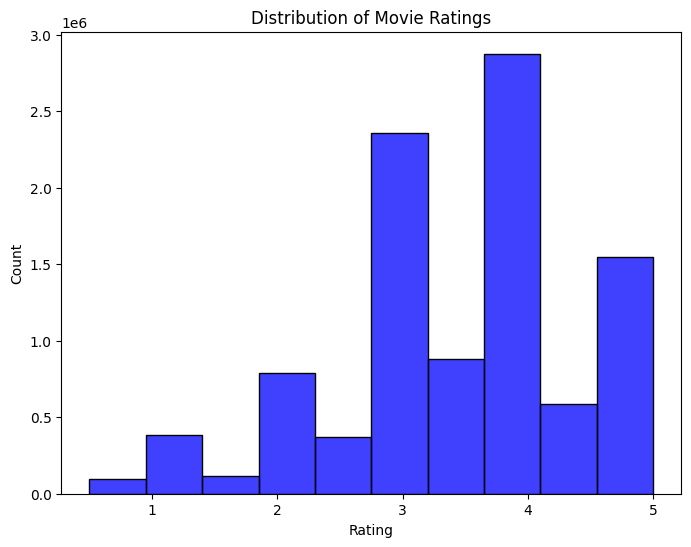

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(ratings['rating'], bins=10, kde=False, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

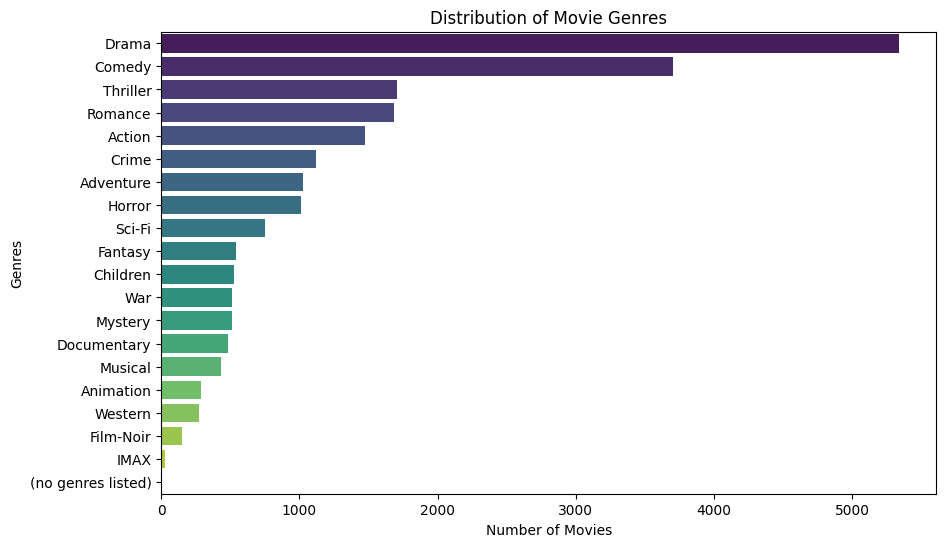

In [13]:
# Create a dataframe with genres exploded into separate rows
genres_df = movies[['movieId', 'genres']].copy()
genres_df['genres'] = genres_df['genres'].str.split('|')
genres_df = genres_df.explode('genres')

# Count the number of occurrences for each genre
genre_counts = genres_df['genres'].value_counts()

# Plot the distribution of genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

In [14]:
# Calculate the number of ratings given by each user
ratings_per_user = ratings.groupby('userId')['rating'].count().sort_values(ascending=False)

# Display the top 10 users with the most ratings
print("\nTop 10 Users by Number of Ratings:")
print(ratings_per_user.head(10))


Top 10 Users by Number of Ratings:
userId
59269    7359
67385    7047
14463    5169
68259    4483
27468    4449
19635    4165
3817     4165
63134    3755
58357    3697
27584    3479
Name: rating, dtype: int64


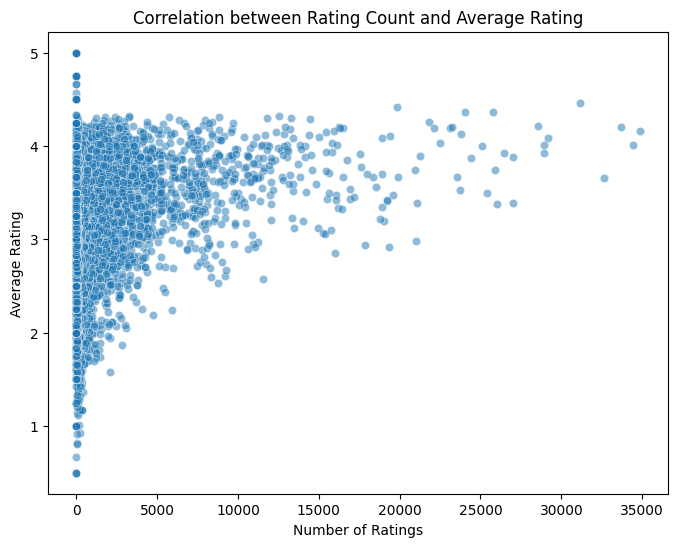

In [15]:
# Calculate the average rating and number of ratings for each movie
movie_stats = merged_df.groupby('movieId').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['average_rating', 'rating_count']

# Plot the relationship between rating count and average rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating_count', y='average_rating', data=movie_stats, alpha=0.5)
plt.title('Correlation between Rating Count and Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

In [16]:
# Filter merged_df for a specific genre
genre = 'Action'  # Change this to any genre you'd like to analyze
top_movies_in_genre = merged_df[merged_df['genres'].str.contains(genre, regex=False)].groupby('title')['rating'].mean().sort_values(ascending=False)

# Display the top 10 highest-rated movies in the selected genre
print(f"\nTop 10 Highest-Rated {genre} Movies:")
print(top_movies_in_genre.head(10))


Top 10 Highest-Rated Action Movies:
title
Fighting Elegy (Kenka erejii) (1966)                                              5.000000
Seven Samurai (Shichinin no samurai) (1954)                                       4.314119
Dark Knight, The (2008)                                                           4.294842
Yojimbo (1961)                                                                    4.277614
City of God (Cidade de Deus) (2002)                                               4.261899
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    4.261317
Crows Zero (Kurôzu zero) (2007)                                                   4.250000
Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977)                      4.220209
Matrix, The (1999)                                                                4.205132
Star Wars: Episode V - The Empire Strikes Back (1980)                             4.194361
Name: rating, dtype: float64


In [9]:
# THIS CODE IS TAKING AN ETERNITY TO EXECUTE., ISSUE IS CALCULATING THE CORRELATIONS FOR A HUGE DATASET
# KINDLY OMIT THIS IN YOUR WORK

# Create a pivot table (user-item matrix) where rows are userId, columns are movie titles, and values are ratings using the merged movie and rating dataframes
user_movie_ratings = merged_df.pivot_table(index='userId', columns='title', values='rating')

# Compute the correlation matrix for movies (item-based collaborative filtering)
# This will compute the correlation between each pair of movies based on user ratings
movie_correlations = user_movie_ratings.corr(method='pearson', min_periods=10)  # Set a threshold for min ratings

# Function to get movie recommendations
def recommend_movies(movie_title, min_ratings=10):
    # Check if the movie is in the dataset
    if movie_title not in movie_correlations:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return
    
    # Get correlations of the given movie with other movies
    similar_movies = movie_correlations[movie_title].dropna()  # Drop NaN values
    similar_movies = similar_movies.sort_values(ascending=False)  # Sort by correlation
    
    # Filter out movies with fewer ratings (to improve quality)
    movie_stats = merged_df.groupby('title')['rating'].count()
    popular_movies = movie_stats[movie_stats >= min_ratings]
    
    # Recommend movies that are highly correlated and popular enough
    recommendations = similar_movies[similar_movies.index.isin(popular_movies.index)]
    
    # Return top 10 movie recommendations
    return recommendations.head(10)

# Example: Get recommendations for a specific movie
movie_title = "Toy Story (1995)"
recommendations = recommend_movies(movie_title)

if recommendations is not None:
    print(f"Top 10 recommendations for '{movie_title}':")
    print(recommendations)


In [17]:
pivot_table = merged_df.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(10)

title,"""Great Performances"" Cats (1998)",'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (a.k.a. The California Dolls) (1981),...And God Created Woman (Et Dieu... créa la femme) (1956),...And God Spoke (1993),...And Justice for All (1979),...,Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),[Rec] (2007),eXistenZ (1999),ffolks (a.k.a. North Sea Hijack) (1980),loudQUIETloud: A Film About the Pixies (2006),xXx: State of the Union (2005),"Âge d'or, L' (1930)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
movie_watched = pivot_table["Bad Boys (1995)"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Bad Boys (1995)" and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head()

title
Boris and Natasha (1992)                   1.0
Brief Crossing (Brève traversée) (2001)    1.0
Tokyo-Ga (1985)                            1.0
Night Tide (1961)                          1.0
Tears of April (Käsky) (2008)              1.0
dtype: float64

In [20]:
movie_watched = pivot_table["Toy Story (1995)"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Toy Story (1995)" and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head()

title
Boy Meets Girl (1984)         1.0
Civil Brand (2002)            1.0
Challenge, The (1982)         1.0
Uninvited Guest, An (1999)    1.0
Elstree Calling (1930)        1.0
dtype: float64

In [21]:
#Jurassic Park (1993)
movie_watched = pivot_table["Jurassic Park (1993)"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Jurassic Park (1993)" and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head()

title
Mass Transit (1998)                     1.0
Mesmerist, The (2002)                   1.0
Maradona by Kusturica (2008)            1.0
Shanghai Express (1932)                 1.0
Small Cuts (Petites coupures) (2003)    1.0
dtype: float64